In [14]:
# Importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("../input/heart-disease-dataset/heart.csv")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [18]:
df.shape

(1025, 14)

In [19]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
df.duplicated().sum()

723

In [23]:
df1 = df.drop_duplicates()
df1.duplicated().sum()

0

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
# Seperating features from the dataset
X = df.iloc[:,:-1].values
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [26]:
# Seperating targets from the dataset
Y = df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 0, 1, 0])

In [28]:
# Scaling the feature values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [32]:
# Seperating training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [33]:
# Checking one row scaled feature from training set
X_train[3]

array([ 0.50352033,  0.66150409, -0.91575542,  1.84989582, -1.35744842,
        2.38733039, -1.00404855, -2.57079518, -0.71228712, -0.06088839,
       -0.6241209 ,  1.20922066, -2.1340963 ])

In [36]:
# Construction of neural network
model = Sequential([
    Dense(units=10, activation='relu'),
    Dense(units=6, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

a = model.fit(X_train, y_train, epochs=500, validation_split=0.2)

Epoch 1/500
21/21 [==============================] - 1s 13ms/step - loss: 0.7175 - accuracy: 0.4619 - val_loss: 0.6914 - val_accuracy: 0.5427
Epoch 2/500
21/21 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.5152 - val_loss: 0.6684 - val_accuracy: 0.6220
Epoch 3/500
21/21 [==============================] - 0s 4ms/step - loss: 0.6639 - accuracy: 0.5915 - val_loss: 0.6494 - val_accuracy: 0.6890
Epoch 4/500
21/21 [==============================] - 0s 4ms/step - loss: 0.6417 - accuracy: 0.6662 - val_loss: 0.6305 - val_accuracy: 0.7073
Epoch 5/500
21/21 [==============================] - 0s 4ms/step - loss: 0.6188 - accuracy: 0.6997 - val_loss: 0.6086 - val_accuracy: 0.7134
Epoch 6/500
21/21 [==============================] - 0s 5ms/step - loss: 0.5924 - accuracy: 0.7454 - val_loss: 0.5854 - val_accuracy: 0.7561
Epoch 7/500
21/21 [==============================] - 0s 4ms/step - loss: 0.5639 - accuracy: 0.7713 - val_loss: 0.5590 - val_accuracy: 0.7744
Epoch 8/500


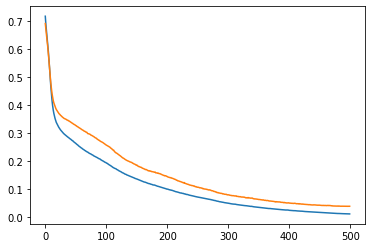

In [37]:
plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])

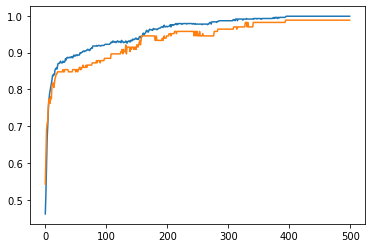

In [38]:
plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])

In [39]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted>0.5
print(np.concatenate((y_predicted.reshape(len(y_predicted),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

Text(-3.0, 0.5, 'Actual')

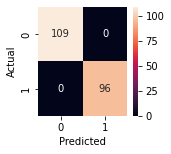

In [40]:
# Building confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(tf.math.confusion_matrix(y_test, y_predicted), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [41]:
# Checking accuracy rate
import sklearn as skt
skt.metrics.accuracy_score(y_test, y_predicted)*100

100.0